---
 **1. logistic regression, decision tree, random forest의 3가지 머신러닝 모델을 적용하여 정확도, 정밀도, 재현률, f1-score, roc-auc score를 확인해 볼 것**

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.datasets import load_breast_cancer

# 데이터 불러오기
cancer_data = load_breast_cancer()
X = cancer_data.data
y = cancer_data.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression 모델 생성 및 학습
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_predictions = logreg_model.predict(X_test)

# Decision Tree 모델 생성 및 학습
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)

# Random Forest 모델 생성 및 학습
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)

# 모델 평가
def evaluate_model(predictions, y_test):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)
    return accuracy, precision, recall, f1, roc_auc

# 각 모델 평가
logreg_metrics = evaluate_model(logreg_predictions, y_test)
tree_metrics = evaluate_model(tree_predictions, y_test)
forest_metrics = evaluate_model(forest_predictions, y_test)

# 결과 출력
print("Logistic Regression Metrics:")
print("Accuracy: {:.4f}".format(logreg_metrics[0]))
print("Precision: {:.4f}".format(logreg_metrics[1]))
print("Recall: {:.4f}".format(logreg_metrics[2]))
print("F1 Score: {:.4f}".format(logreg_metrics[3]))
print("ROC-AUC Score: {:.4f}".format(logreg_metrics[4]))
print("\n")

print("Decision Tree Metrics:")
print("Accuracy: {:.4f}".format(tree_metrics[0]))
print("Precision: {:.4f}".format(tree_metrics[1]))
print("Recall: {:.4f}".format(tree_metrics[2]))
print("F1 Score: {:.4f}".format(tree_metrics[3]))
print("ROC-AUC Score: {:.4f}".format(tree_metrics[4]))
print("\n")

print("Random Forest Metrics:")
print("Accuracy: {:.4f}".format(forest_metrics[0]))
print("Precision: {:.4f}".format(forest_metrics[1]))
print("Recall: {:.4f}".format(forest_metrics[2]))
print("F1 Score: {:.4f}".format(forest_metrics[3]))
print("ROC-AUC Score: {:.4f}".format(forest_metrics[4]))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Metrics:
Accuracy: 0.9649
Precision: 0.9589
Recall: 0.9859
F1 Score: 0.9722
ROC-AUC Score: 0.9581


Decision Tree Metrics:
Accuracy: 0.9386
Precision: 0.9444
Recall: 0.9577
F1 Score: 0.9510
ROC-AUC Score: 0.9324


Random Forest Metrics:
Accuracy: 0.9649
Precision: 0.9589
Recall: 0.9859
F1 Score: 0.9722
ROC-AUC Score: 0.9581


---
**2. 결과 중 하나의 모델을 선택하여 roc-curve와 precision-recall curve를 출력해 볼 것**

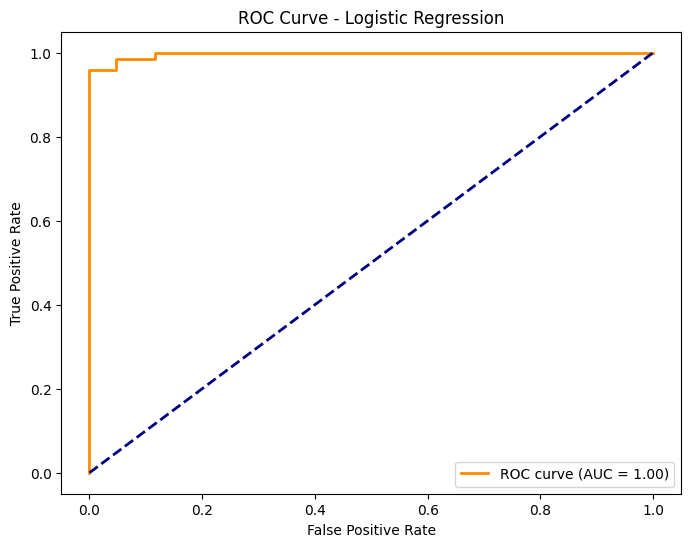

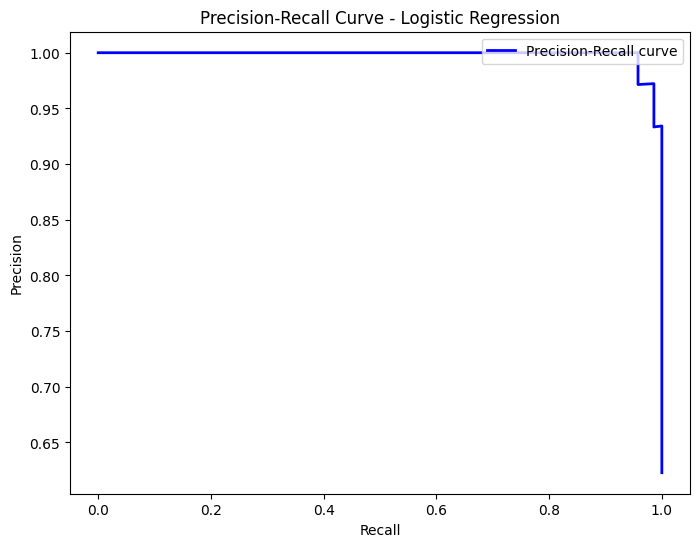

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc


# 예측 확률 얻기
y_probs = logreg_model.predict_proba(X_test)[:, 1]

# ROC Curve 그리기
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve 그리기
precision, recall, _ = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.legend(loc='upper right')
plt.show()

---
**3. 위의 모델에 gridsearch를 포함하여 성능을 추가호 개선할 수 있는 기법을 적용하여 정확도, 정밀도, 재현률, f1-score, roc-auc score를 확인하여 성능의 개선을 시도해 보고 그 결과를 분석해 볼 것**

In [5]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression 모델 생성
logreg_model = LogisticRegression()

# 탐색할 하이퍼파라미터 값들 정의
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy')

# 데이터에 대해 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델 얻기
best_model = grid_search.best_estimator_

# 최적 모델로 예측
best_predictions = best_model.predict(X_test)

# 모델 평가
best_metrics = evaluate_model(best_predictions, y_test)

# 결과 출력
print("최적 모델 Metrics:")
print("Accuracy: {:.4f}".format(best_metrics[0]))
print("Precision: {:.4f}".format(best_metrics[1]))
print("Recall: {:.4f}".format(best_metrics[2]))
print("F1 Score: {:.4f}".format(best_metrics[3]))
print("ROC-AUC Score: {:.4f}".format(best_metrics[4]))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

최적의 하이퍼파라미터: {'C': 100, 'penalty': 'l2'}
최적 모델 Metrics:
Accuracy: 0.9649
Precision: 0.9589
Recall: 0.9859
F1 Score: 0.9722
ROC-AUC Score: 0.9581


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

---
**4. feature importance를 확인하여 그 결과를 분석해 볼 것**

특성 중요도:
worst radius: 1.4152
mean radius: 1.3467
worst concavity: -0.9202
worst compactness: -0.7439
worst texture: -0.6727
mean texture: 0.6126
texture error: 0.5775
mean concavity: -0.3405
worst concave points: -0.2695
worst symmetry: -0.2488
mean compactness: -0.2464
worst perimeter: -0.1917
mean concave points: -0.1457
area error: -0.1214
mean perimeter: 0.1143
worst smoothness: -0.0922
mean symmetry: -0.0774
concavity error: -0.0695
worst fractal dimension: -0.0693
perimeter error: 0.0631
mean smoothness: -0.0518
compactness error: -0.0504
radius error: 0.0467
concave points error: -0.0187
symmetry error: -0.0182
worst area: -0.0171
mean fractal dimension: -0.0157
mean area: -0.0138
smoothness error: -0.0048
fractal dimension error: -0.0044


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


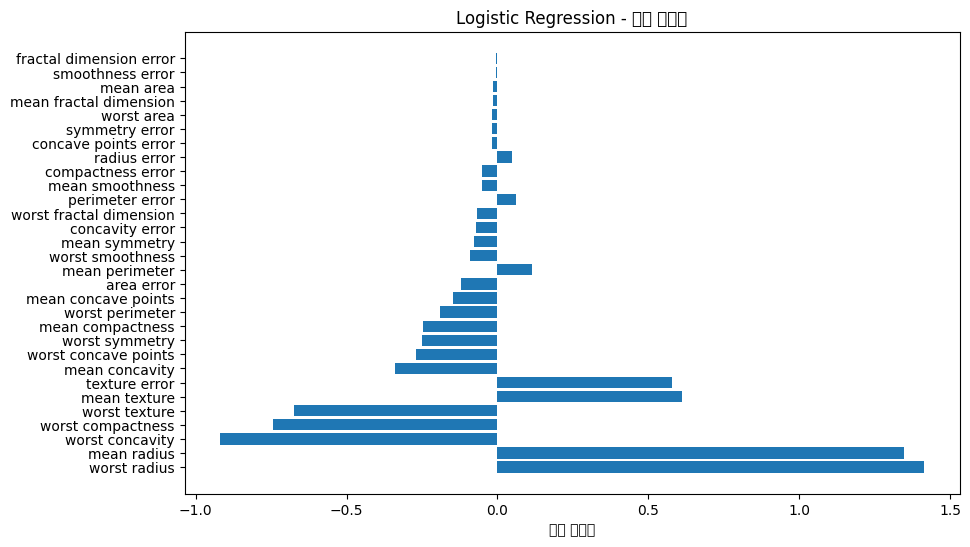

In [ ]:
import numpy as np

# 최적 모델의 계수 (coefficients) 확인
coefficients = best_model.coef_[0]

# 특성 이름 얻기
feature_names = cancer_data.feature_names

# 특성 중요도를 튜플로 묶기
feature_importance = list(zip(feature_names, coefficients))

# 특성 중요도를 절대값으로 변환하여 내림차순으로 정렬
feature_importance = sorted(feature_importance, key=lambda x: np.abs(x[1]), reverse=True)

# 결과 출력
print("특성 중요도:")
for feature, importance in feature_importance:
    print(f"{feature}: {importance:.4f}")

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), [importance for _, importance in feature_importance], align='center')
plt.yticks(range(len(feature_importance)), [feature for feature, _ in feature_importance])
plt.xlabel('특성 중요도')
plt.title('Logistic Regression - 특성 중요도')
plt.show()
